# Anti-de Sitter spacetime

This worksheet demonstrates a few capabilities of [SageManifolds](http://sagemanifolds.obspm.fr) (version 0.9.1) in computations regarding anti-de Sitter spacetime.

Click [here](https://raw.githubusercontent.com/sagemanifolds/SageManifolds/master/Worksheets/v0.9.1/SM_AdS.ipynb) to download the worksheet file (ipynb format). To run it, you must start SageMath within the Jupyter notebook, via the command `sage -n jupyter`

First we set up the notebook to display mathematical objects using LaTeX formatting:

In [1]:
%display latex

We also define a viewer for 3D plots (use `'jmol'` for interactive 3D graphics):

In [2]:
viewer3D = 'tachyon' # must be 'jmol', 'tachyon' or None (default)

## Spacetime manifold

We declare the anti-de Sitter spacetime as a 4-dimensional differentiable manifold:

In [3]:
M = Manifold(4, 'M', r'\mathcal{M}')
print(M) ; M

4-dimensional differentiable manifold M


4-dimensional differentiable manifold M

<p>We consider hyperbolic coordinates $(\tau,\rho,\theta,\phi)$ on $\mathcal{M}$. Allowing for the standard coordinate singularities at $\rho=0$, $\theta=0$ or $\theta=\pi$, these coordinates cover the entire spacetime manifold (which is topologically $\mathbb{R}^4$). If we restrict ourselves to <em>regular</em> coordinates (i.e. to considering only mathematically well defined charts), the hyperbolic coordinates cover only an open part of $\mathcal{M}$, which we call $\mathcal{M}_0$, on which $\rho$ spans the open interval $(0,+\infty)$, $\theta$ the open interval $(0,\pi)$ and $\phi$ the open interval $(0,2\pi)$. Therefore, we declare:</p>

In [4]:
M0 = M.open_subset('M_0', r'\mathcal{M}_0' )
X_hyp.<ta,rh,th,ph> = M0.chart(r'ta:\tau rh:(0,+oo):\rho th:(0,pi):\theta ph:(0,2*pi):\phi')
print(X_hyp) ; X_hyp

Chart (M_0, (ta, rh, th, ph))


Chart (M_0, (ta, rh, th, ph))

<h2>$\mathbb{R}^5$ as an ambient space</h2>
<p>The AdS metric can be defined as that induced by the immersion of $\mathcal{M}$ in $\mathbb{R}^5$ equipped with a flat pseudo-Riemannian metric of signature $(-,-,+,+,+)$. We therefore introduce $\mathbb{R}^5$ as a 5-dimensional manifold covered by canonical coordinates:</p>

In [5]:
R5 = Manifold(5, 'R5', r'\mathbb{R}^5')
X5.<U,V,X,Y,Z> = R5.chart()
print(X5) ; X5

Chart (R5, (U, V, X, Y, Z))


Chart (R5, (U, V, X, Y, Z))

<p>The AdS immersion into $\mathbb{R}^5$ is defined as a differential map $\Phi$ from $\mathcal{M}$ to $\mathbb{R}^5$, by providing its expression in terms of $\mathcal{M}$'s default chart (which is X_hyp = $(\mathcal{M}_0,(\tau,\rho,\theta,\phi))$ ) and $\mathbb{R}^5$'s default chart (which is X5 = $(\mathbb{R}^5,(U,V,X,Y,Z))$ ):</p>

In [6]:
var('b', domain='real')
assume(b>0)
Phi = M.diff_map(R5, [sin(b*ta)/b * cosh(rh),
                      cos(b*ta)/b * cosh(rh),
                      sinh(rh)/b *sin(th)*cos(ph),
                      sinh(rh)/b *sin(th)*sin(ph),
                      sinh(rh)/b *cos(th)],
                 name='Phi', latex_name=r'\Phi')
print(Phi) ; Phi.display()

Differentiable map Phi from the 4-dimensional differentiable manifold M to the 5-dimensional differentiable manifold R5


Phi: M --> R5
on M_0: (ta, rh, th, ph) |--> (U, V, X, Y, Z) = (cosh(rh)*sin(b*ta)/b, cos(b*ta)*cosh(rh)/b, cos(ph)*sin(th)*sinh(rh)/b, sin(ph)*sin(th)*sinh(rh)/b, cos(th)*sinh(rh)/b)

<p>The constant $b$ is a scale parameter. Considering AdS metric as a solution of vacuum Einstein equation with negative cosmological constant $\Lambda$, one has $b = \sqrt{-\Lambda/3}$. </p>
<p>Let us evaluate the image of a point via the map $\Phi$:</p>

In [7]:
p = M.point((ta, rh, th, ph), name='p') ; print(p)

Point p on the 4-dimensional differentiable manifold M


In [8]:
p.coord()

(ta, rh, th, ph)

In [9]:
q = Phi(p) ; print(q)

Point Phi(p) on the 5-dimensional differentiable manifold R5


In [10]:
q.coord()

(cosh(rh)*sin(b*ta)/b,
 cos(b*ta)*cosh(rh)/b,
 cos(ph)*sin(th)*sinh(rh)/b,
 sin(ph)*sin(th)*sinh(rh)/b,
 cos(th)*sinh(rh)/b)

<p>The image of $\mathcal{M}$ by the immersion $\Phi$ is a hyperboloid of one sheet, of equation $-U^2-V^2+X^2+Y^2+Z^2=-b^{-2}$. Indeed:</p>

In [11]:
(Uq,Vq,Xq,Yq,Zq) = q.coord()
s = - Uq^2 - Vq^2 + Xq^2 + Yq^2 + Zq^2
s.simplify_full()

-1/b^2

<p>We may use the immersion $\Phi$ to draw the coordinate grid $(\tau,\rho)$ in terms of the coordinates $(U,V,X)$ for $\theta=\pi/2$ and $\phi=0$ (red) and $\theta=\pi/2$ and $\phi=\pi$ (green) (the brown lines are the lines $\tau={\rm const}$):</p>

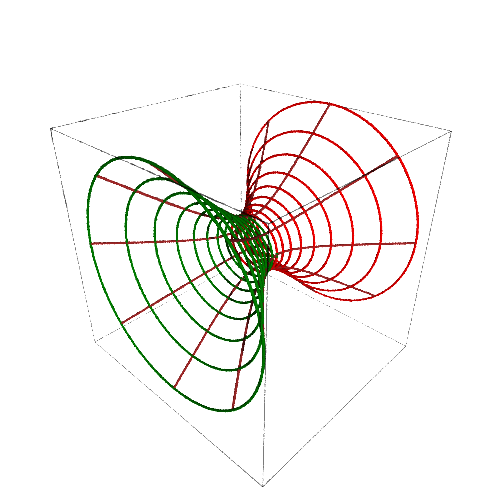

In [12]:
graph1 = X_hyp.plot(X5, mapping=Phi, ambient_coords=(V,X,U), fixed_coords={th:pi/2, ph:0}, 
                    ranges={ta:(0,2*pi), rh:(0,2)}, nb_values=9, color={ta:'red', rh:'brown'},
                    thickness=2, parameters={b:1}, label_axes=False)
graph2 = X_hyp.plot(X5, mapping=Phi, ambient_coords=(V,X,U), fixed_coords={th:pi/2, ph:pi},
                    ranges={ta:(0,2*pi), rh:(0,2)}, nb_values=9, color={ta:'green', rh:'brown'},
                    thickness=2, parameters={b:1}, label_axes=False)
from sage.manifolds.utilities import set_axes_labels
show(set_axes_labels(graph1+graph2,'V','X','U'), aspect_ratio=1, viewer=viewer3D)

<h2>Spacetime metric</h2>
<p>First, we introduce on $\mathbb{R}^5$ the flat pseudo-Riemannian metric $h$ of signature $(-,-,+,+,+)$:</p>

In [13]:
h = R5.metric('h', signature=1)
h[0,0], h[1,1], h[2,2], h[3,3], h[4,4] = -1, -1, 1, 1, 1
h.display()

h = -dU*dU - dV*dV + dX*dX + dY*dY + dZ*dZ

<p>As mentionned above, the AdS metric $g$ on $\mathcal{M}$ is that induced by $h$, i.e.$g$ is the pullback of $h$ by the map $\Phi$:</p>

In [14]:
g = M.lorentzian_metric('g')
g.set( Phi.pullback(h) )

<p>The expression of $g$ in terms of $\mathcal{M}$'s default frame is found to be</p>

In [15]:
g.display()

g = -cosh(rh)^2 dta*dta + b^(-2) drh*drh + sinh(rh)^2/b^2 dth*dth + sin(th)^2*sinh(rh)^2/b^2 dph*dph

In [16]:
g[:]

[             -cosh(rh)^2                        0                        0                        0]
[                       0                   b^(-2)                        0                        0]
[                       0                        0           sinh(rh)^2/b^2                        0]
[                       0                        0                        0 sin(th)^2*sinh(rh)^2/b^2]

<h2>Curvature</h2>
<p>The Riemann tensor of $g$ is</p>

In [17]:
Riem = g.riemann()
print(Riem)
Riem.display()

Tensor field Riem(g) of type (1,3) on the 4-dimensional differentiable manifold M


Riem(g) = -d/dta*drh*dta*drh + d/dta*drh*drh*dta - sinh(rh)^2 d/dta*dth*dta*dth + sinh(rh)^2 d/dta*dth*dth*dta - sin(th)^2*sinh(rh)^2 d/dta*dph*dta*dph + sin(th)^2*sinh(rh)^2 d/dta*dph*dph*dta - b^2*cosh(rh)^2 d/drh*dta*dta*drh + b^2*cosh(rh)^2 d/drh*dta*drh*dta - sinh(rh)^2 d/drh*dth*drh*dth + sinh(rh)^2 d/drh*dth*dth*drh - sin(th)^2*sinh(rh)^2 d/drh*dph*drh*dph + sin(th)^2*sinh(rh)^2 d/drh*dph*dph*drh - b^2*cosh(rh)^2 d/dth*dta*dta*dth + b^2*cosh(rh)^2 d/dth*dta*dth*dta + d/dth*drh*drh*dth - d/dth*drh*dth*drh - sin(th)^2*sinh(rh)^2 d/dth*dph*dth*dph + sin(th)^2*sinh(rh)^2 d/dth*dph*dph*dth - b^2*cosh(rh)^2 d/dph*dta*dta*dph + b^2*cosh(rh)^2 d/dph*dta*dph*dta + d/dph*drh*drh*dph - d/dph*drh*dph*drh + sinh(rh)^2 d/dph*dth*dth*dph - sinh(rh)^2 d/dph*dth*dph*dth

In [18]:
Riem.display_comp(only_nonredundant=True)

Riem(g)^ta_rh,ta,rh = -1 
Riem(g)^ta_th,ta,th = -sinh(rh)^2 
Riem(g)^ta_ph,ta,ph = -sin(th)^2*sinh(rh)^2 
Riem(g)^rh_ta,ta,rh = -b^2*cosh(rh)^2 
Riem(g)^rh_th,rh,th = -sinh(rh)^2 
Riem(g)^rh_ph,rh,ph = -sin(th)^2*sinh(rh)^2 
Riem(g)^th_ta,ta,th = -b^2*cosh(rh)^2 
Riem(g)^th_rh,rh,th = 1 
Riem(g)^th_ph,th,ph = -sin(th)^2*sinh(rh)^2 
Riem(g)^ph_ta,ta,ph = -b^2*cosh(rh)^2 
Riem(g)^ph_rh,rh,ph = 1 
Riem(g)^ph_th,th,ph = sinh(rh)^2

<p>The Ricci tensor:</p>

In [19]:
Ric = g.ricci()
print(Ric)
Ric.display()

Field of symmetric bilinear forms Ric(g) on the 4-dimensional differentiable manifold M


Ric(g) = 3*b^2*cosh(rh)^2 dta*dta - 3 drh*drh - 3*sinh(rh)^2 dth*dth - 3*sin(th)^2*sinh(rh)^2 dph*dph

In [20]:
Ric[:]

[       3*b^2*cosh(rh)^2                       0                       0                       0]
[                      0                      -3                       0                       0]
[                      0                       0           -3*sinh(rh)^2                       0]
[                      0                       0                       0 -3*sin(th)^2*sinh(rh)^2]

<p>The Ricci scalar:</p>

In [21]:
R = g.ricci_scalar()
print(R)
R.display()

Scalar field r(g) on the 4-dimensional differentiable manifold M


r(g): M --> R
on M_0: (ta, rh, th, ph) |--> -12*b^2

We recover the fact that AdS spacetime has a constant curvature. It is indeed a **maximally symmetric space**. In particular, the Riemann tensor is expressible as
$$ R^i_{\ \, jlk} = \frac{R}{n(n-1)} \left( \delta^i_{\ \, k} g_{jl} - \delta^i_{\ \, l} g_{jk} \right), $$
where $n$ is the dimension of $\mathcal{M}$: $n=4$ in the present case. Let us check this formula here, under the form $R^i_{\ \, jlk} = -\frac{R}{6} g_{j[k} \delta^i_{\ \, l]}$:

In [22]:
delta = M.tangent_identity_field() 
Riem == - (R/6)*(g*delta).antisymmetrize(2,3)  # 2,3 = last positions of the type-(1,3) tensor g*delta

True

<p>We may also check that AdS metric is a solution of the vacuum <strong>Einstein equation</strong> with (negative) cosmological constant:</p>

In [23]:
Lambda = -3*b^2
Ric - 1/2*R*g + Lambda*g == 0

True

## Spherical coordinates
Let us introduce spherical coordinates $(\tau,r,\theta,\phi)$ on the AdS spacetime via the coordinate change
$$ r = \frac{\sinh(\rho)}{b} $$

In [24]:
X_spher.<ta,r,th,ph> = M0.chart(r'ta:\tau r:(0,+oo) th:(0,pi):\theta ph:(0,2*pi):\phi')
print(X_spher) ; X_spher

Chart (M_0, (ta, r, th, ph))


Chart (M_0, (ta, r, th, ph))

In [25]:
hyp_to_spher = X_hyp.transition_map(X_spher, [ta, sinh(rh)/b, th, ph])
hyp_to_spher.display()

ta = ta
r = sinh(rh)/b
th = th
ph = ph

In [26]:
hyp_to_spher.set_inverse(ta, asinh(b*r), th, ph)
spher_to_hyp = hyp_to_spher.inverse()
spher_to_hyp.display()

ta = ta
rh = arcsinh(b*r)
th = th
ph = ph

<p>The expression of the metric tensor in the new coordinates is</p>

In [27]:
g.display(X_spher.frame(), X_spher)

g = (-b^2*r^2 - 1) dta*dta + 1/(b^2*r^2 + 1) dr*dr + r^2 dth*dth + r^2*sin(th)^2 dph*dph

Similarly, the expression of the Riemann tensor is

In [28]:
Riem.display_comp(X_spher.frame(), X_spher, only_nonredundant=True)

Riem(g)^ta_r,ta,r = -b^2/(b^2*r^2 + 1) 
Riem(g)^ta_th,ta,th = -b^2*r^2 
Riem(g)^ta_ph,ta,ph = -b^2*r^2*sin(th)^2 
Riem(g)^r_ta,ta,r = -b^4*r^2 - b^2 
Riem(g)^r_th,r,th = -b^2*r^2 
Riem(g)^r_ph,r,ph = -b^2*r^2*sin(th)^2 
Riem(g)^th_ta,ta,th = -b^4*r^2 - b^2 
Riem(g)^th_r,r,th = b^2/(b^2*r^2 + 1) 
Riem(g)^th_ph,th,ph = -b^2*r^2*sin(th)^2 
Riem(g)^ph_ta,ta,ph = -b^4*r^2 - b^2 
Riem(g)^ph_r,r,ph = b^2/(b^2*r^2 + 1) 
Riem(g)^ph_th,th,ph = b^2*r^2